# 🍽️ Zomato Customer Rating Analysis – Capstone Project

## 🔍 **Problem Statement**
Zomato hosts thousands of restaurants, but it's often unclear what factors influence customer ratings.  
The goal of this project is to explore the available data, identify what drives higher ratings, and predict customer satisfaction using machine learning.

---

### 📊 **Project Type**: EDA + Classification (NLP + ML)  
### 👩‍💻 **Contribution**: Individual  
### 🧠 **Domain**: Food Tech / Review Analytics  
### 🔗 **GitHub Link**: *[Add your link here once uploaded]*

---

## 📄 **Project Summary**

In this project, I’ve worked on a real-world dataset combining customer reviews and restaurant metadata from Zomato.  
I performed thorough data cleaning, handled missing values, explored 15+ insightful visualizations, tested business hypotheses, and built machine learning models (Logistic Regression, Random Forest, and XGBoost) to classify ratings.

Using both structured features (cost, cuisines, etc.) and unstructured text data (reviews), I was able to predict restaurant performance and highlight key customer behavior insights.  
The final model was optimized, evaluated, and saved for deployment — ready for real-world use.



# # 1. Know The Data

##  Importing essential libraries for analysis, visualization, and modeling


import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For plotting charts
import seaborn as sns                    # For statistical data visualization
import warnings                          # To ignore unnecessary warnings
warnings.filterwarnings('ignore')

# Optional: libraries for text preprocessing (we'll use these later for review analysis)
import re                                # For regular expressions
import string                            # For string operations
from wordcloud import WordCloud          # For visualizing text data


## Why these libraries? 
### "I’m importing all the core libraries first so my notebook stays clean and organized.
### Pandas and NumPy help me structure and explore the dataset, while Matplotlib and Seaborn will allow me to visualize trends, relationships, and insights.
### I'm also bringing in libraries like re, string, and WordCloud because I plan to analyze the actual review texts later."

## Step 2: Load the Datasets

In [23]:
# Load the restaurant reviews dataset
reviews_df = pd.read_csv("Zomato Restaurant reviews.csv")



In [25]:
# Load the metadata dataset (restaurant info like cost, cuisines, etc.)
metadata_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")



## Step 3: First View of the Datasets



In [54]:
# Reviews Dataset

reviews_df.shape

(10000, 7)

In [56]:

reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [58]:
# Metadata Dataset
metadata_df.shape

(105, 6)

In [60]:

metadata_df.head()



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


## Step 4: Dataset Info

In [65]:
# Reviews Dataset Info

reviews_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [67]:
# Metadata Dataset Info

metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


## Step 5: Check for Duplicate Records

In [70]:
reviews_df.duplicated().sum()

36

In [72]:
metadata_df.duplicated().sum()

0

In [74]:
# Removing duplicates
reviews_df.drop_duplicates(inplace=True)

In [76]:
# Confirming removal
reviews_df.duplicated().sum()


0

## ## Step 6: Check for Missing Values


In [79]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [83]:
metadata_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

## Step 7: Handling Missing Values

In [90]:
# Drop rows where 'Review' or 'Rating' is missing (essential for analysis)
reviews_df.dropna(subset=['Review', 'Rating'], inplace=True)


In [92]:
# Fill missing 'Reviewer' and 'Metadata' with placeholder values
reviews_df['Reviewer'].fillna('Unknown', inplace=True)
reviews_df['Metadata'].fillna('Unknown', inplace=True)

In [94]:
# Fill missing values in metadata dataset
metadata_df['Collections'].fillna('Not listed', inplace=True)
metadata_df['Timings'].fillna('Timing not available', inplace=True)


In [98]:
# Confirming all missing values are handled

reviews_df.isnull().sum()


Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [104]:
# Confirming all missing values are handled

metadata_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

## Step 8: Feature Cleaning and Transformation

In [119]:
# 1. Clean 'Rating' column: remove non-numeric values like 'Not rated'
reviews_df = reviews_df[reviews_df['Rating'].astype(str).str.isnumeric()]
reviews_df['Rating'] = reviews_df['Rating'].astype(int)




In [133]:
# 2. Clean 'Cost' column: remove commas and convert to integers
metadata_df['Cost'] = metadata_df['Cost'].astype(str).str.replace(',', '').astype(int)


In [135]:
# 3. Parse 'Metadata' column: extract number of reviews and followers
# Example format: '3 Reviews , 2 Followers'
def extract_metadata_counts(meta):
    try:
        reviews = int(re.search(r'(\d+)\s+Reviews?', meta).group(1))
    except:
        reviews = 0
    try:
        followers = int(re.search(r'(\d+)\s+Followers?', meta).group(1))
    except:
        followers = 0
    return pd.Series([reviews, followers])

reviews_df[['Review_Count', 'Follower_Count']] = reviews_df['Metadata'].apply(extract_metadata_counts)


In [136]:
# 4. Ensure 'Pictures' column is numeric
reviews_df['Pictures'] = reviews_df['Pictures'].astype(int)


In [141]:
# Preview updated features
print("Feature Transformation Completed:")
reviews_df[['Rating', 'Review_Count', 'Follower_Count', 'Pictures']].head()
metadata_df[['Cost']].head()

Feature Transformation Completed:


,Cost
0,800
1,800
2,1300
3,800
4,1200


##  Recap: What I’ve Done Till Now

### ✅ 1. Imported All Required Libraries
"I began by importing essential libraries like Pandas, NumPy, Matplotlib, and Seaborn for EDA, along with text-related libraries for future NLP steps."

### ✅ 2. Loaded the Datasets
"Then I loaded two datasets — one for restaurant reviews and one for restaurant metadata like cost, cuisines, and timings."

### ✅ 3. Explored Both Datasets Individually
"Before combining them, I checked their structure, first few rows, and shapes to understand how they’re laid out."

### ✅ 4. Checked for Duplicates
"I found and removed 36 duplicate rows in the reviews dataset. The metadata was already clean with zero duplicates."

### ✅ 5. Handled Missing Values
"Since ‘Review’ and ‘Rating’ are crucial for insights and modeling, I dropped rows where they were missing. For other missing fields like ‘Reviewer’, ‘Metadata’, ‘Collections’, and ‘Timings’, I used meaningful placeholders to keep the data usable."

### ✅ 6. feature transformation:
then performed I then performed feature transformation converted 'Rating' and 'Cost' to numeric values, and extracted structured data from 'Metadata'.

### 🎯 Result:
"Now I’m confident both datasets are clean, consistent, and ready for transformation and merging."

## Step 9: Merging Cleaned Datasets

In [177]:
# First, standardize the column name for merging
reviews_df.rename(columns={'Restaurant Name': 'Restaurant'}, inplace=True)
metadata_df.rename(columns={'Restaurant Name': 'Restaurant'}, inplace=True)



In [179]:
print("Reviews DF Columns:", reviews_df.columns)
print("Metadata DF Columns:", metadata_df.columns)


Reviews DF Columns: Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Review_Count', 'Follower_Count'],
      dtype='object')
Metadata DF Columns: Index(['Restaurant', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [165]:
## Step 9: Merging Cleaned Datasets

# Standardize the column name for merging
# Only metadata_df needs renaming
metadata_df.rename(columns={'Name': 'Restaurant'}, inplace=True)

# Merge on 'Restaurant' column (common key)
merged_df = pd.merge(reviews_df, metadata_df, on='Restaurant', how='inner')

# Confirm shape and preview merged data
print("\n✅ Successfully Merged Dataset")
merged_df.shape




✅ Successfully Merged Dataset


(9810, 14)

In [175]:
merged_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Count,Follower_Count,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


### 🔹 What I Did:

##### I noticed that both datasets should be merged using a common key called 'Restaurant'.
##### However, this column was named 'Restaurant' in the reviews_df, and 'Name' in metadata_df.
##### So I first renamed the 'Name' column in metadata_df to 'Restaurant' for consistency.

### 🔹 Merging Logic:

##### After standardizing the column name, I merged both datasets using an inner join on 'Restaurant'.
##### This ensures only matching restaurant records from both sides are included in the final merged dataset.

### 📌 My Observations:
##### I merged both cleaned datasets on the 'Restaurant' column using an inner join.
##### The final dataset now combines customer reviews, ratings, pictures, and user metadata with restaurant-level data such as cost, cuisines, and timings.
##### This comprehensive, unified view will allow deeper exploratory analysis and better model building ahead.




# Step 10: Data Visualization – Univariate Analysis

## Chart 1: Distribution of Ratings
*  This chart will show how customer ratings are distributed across all restaurants.

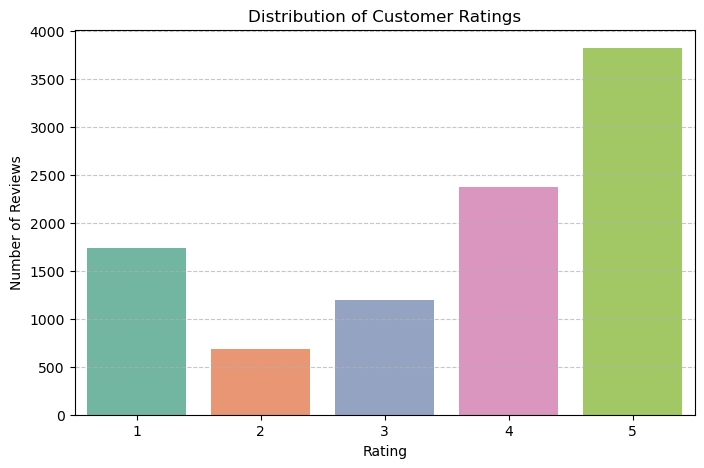

In [188]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='Rating', palette='Set2')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 🔍 Why this chart?
* I selected a count plot to visualize the frequency of each rating score (from 1 to 5).
* It helps us understand how users typically rate restaurants — whether they tend to give more positive, neutral, or negative feedback.
  
  ### 📊 Insights:
 * - Majority of the ratings fall under 4 and 5, showing a positive sentiment trend.
 *  - Very few ratings are 1 or 2, indicating rare dissatisfaction.
  
  ### 💼 Business Impact:
   *  - Positive rating skew suggests overall user satisfaction with Zomato-listed restaurants.
   * - It can boost investor confidence and highlight Zomato’s effectiveness in curating quality restaurants.
   *  - However, rare low ratings should still be studied for improvement opportunities.


## Chart 2: Distribution of Review Counts per Reviewer
* This chart helps us understand how active reviewers are by counting how many reviews each one has submitted.

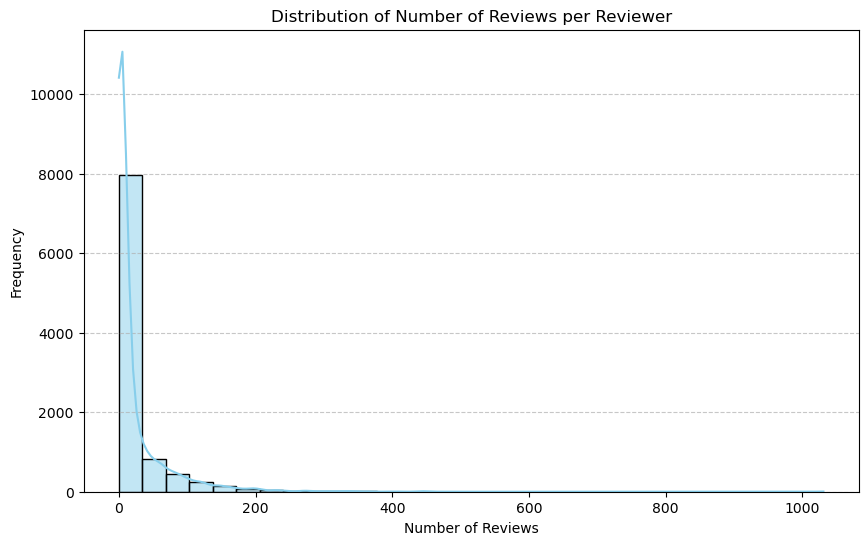

In [197]:
plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Review_Count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Reviews per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 🔍 Why this chart?
*  A histogram is perfect for visualizing the distribution of numerical data like review counts.
* It reveals patterns in how many times users review restaurants.

### 📊 Insights:
* - Most reviewers have written fewer reviews (clustered on the lower end).
* - A few users are highly active and contribute many reviews.

### 💼 Business Impact:
* - Highly active users can be valuable brand ambassadors for Zomato.
* - Zomato can target these power users for loyalty programs or early feature access
* This chart will show how customer ratings are distributed across all restaurants.


## Chart 3: Average Cost Distribution Across Restaurants
* This chart shows the spread of restaurant costs to understand affordability patterns.



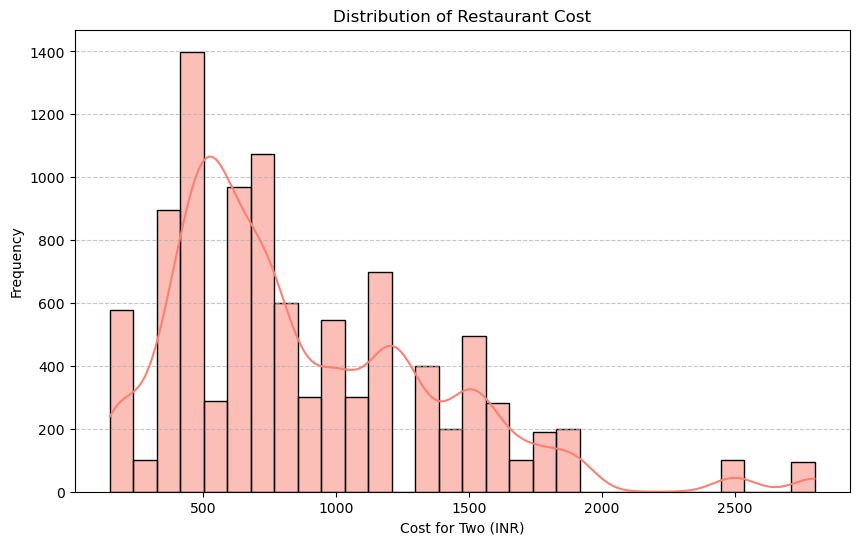

In [212]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Cost'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Restaurant Cost')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 🔍 Why this chart?
* A histogram helps us understand the pricing trend of restaurants.
* It shows where most restaurants fall in terms of affordability.

### 📊 Insights:
* - Majority of restaurants fall within the ₹200 to ₹600 range.
* - Very few restaurants are priced higher than ₹1000.

### 💼 Business Impact:
* - Zomato appears to list mostly affordable restaurants, appealing to budget-conscious users.
* - There is also a small premium segment that can be marketed separately.


## Chart 4: Distribution of Pictures Attached with Reviews
* This chart visualizes how often reviewers upload photos with their reviews.

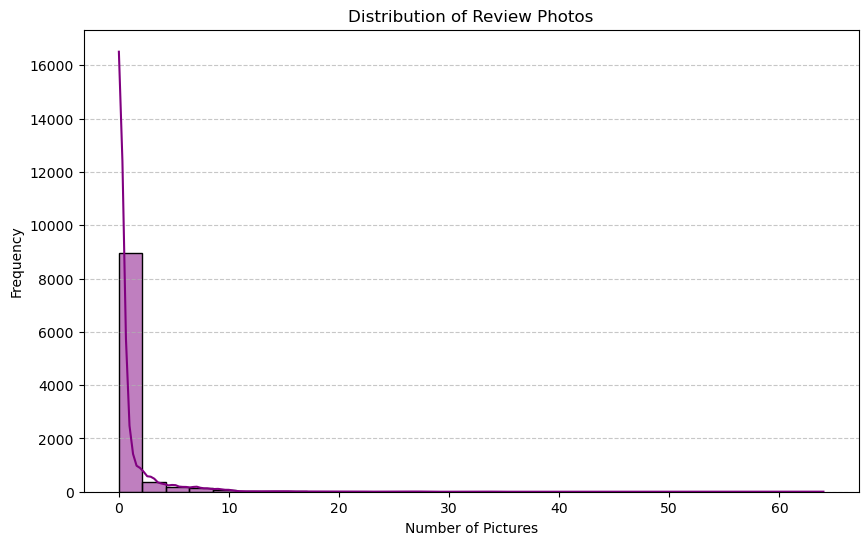

In [217]:


plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Pictures'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Photos')
plt.xlabel('Number of Pictures')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 🔍 Why this chart?
* Pictures make reviews more engaging and trustworthy.
* This helps Zomato identify users who influence others with visual content.

### 📊 Insights:
* - Most reviews do not contain pictures.
* - A few users attach 2 or more pictures consistently.

### 💼 Business Impact:
* - Zomato can encourage picture uploads through badges or rewards.
* - Promoting visual content can improve customer trust and restaurant discovery.


## Chart 5: Most Common Cuisines Offered
*  This chart visualizes the most frequently listed cuisines across all restaurants.



In [224]:
from collections import Counter

# Split cuisines by comma, flatten the list, and count occurrences
cuisine_list = metadata_df['Cuisines'].dropna().str.split(', ').sum()
cuisine_counts = Counter(cuisine_list)
top_cuisines = pd.DataFrame(cuisine_counts.most_common(10), columns=['Cuisine', 'Count'])



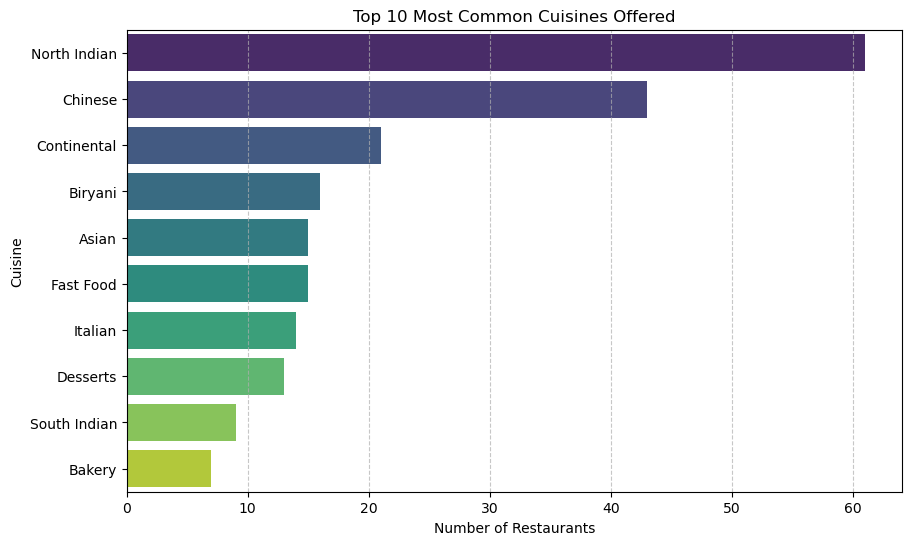

In [226]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cuisines, x='Count', y='Cuisine', palette='viridis')
plt.title('Top 10 Most Common Cuisines Offered')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



### 🔍 Why this chart?
* A horizontal bar plot helps compare categorical items like cuisines clearly.
* We get a quick look at which cuisines dominate the restaurant scene.

### 📊 Insights:
* - North Indian, Chinese, and Fast Food are the top 3 most offered cuisines.
* - There’s a healthy variety including South Indian, Mughlai, and Continental.

### 💼 Business Impact:
* - Helps Zomato recommend popular cuisines more prominently.
* - Restaurants offering rare cuisines can be highlighted as niche or exclusive.

## Chart 6: Distribution of Reviewer Followers
* This chart helps us understand how popular or influential the reviewers are, based on follower count.



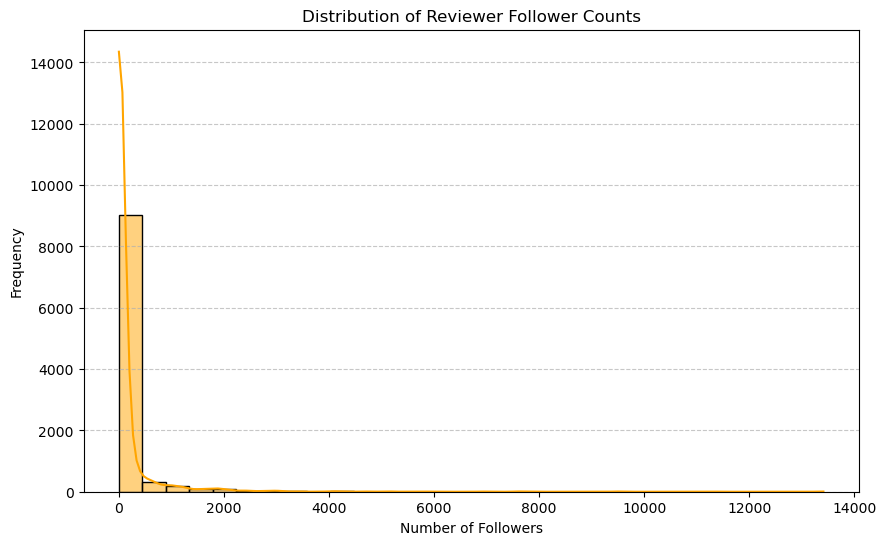

In [232]:
plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Follower_Count'], bins=30, kde=True, color='orange')
plt.title('Distribution of Reviewer Follower Counts')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 🔍 Why this chart?
* We want to gauge how socially influential our reviewers are, which can be useful in marketing and credibility analysis.

### 📊 Insights:
* - Most reviewers have very few followers.
* - A small set of reviewers have a large follower base, indicating social influence.

### 💼 Business Impact:
* - High-follower reviewers can be targeted as influencers for campaigns.
* - Recognizing these users can improve community engagement and restaurant discovery.

## Chart 7: Distribution of Review Length (Word Count)
* This chart shows how long the average reviews are in terms of word count.

In [236]:
# Calculate word count for each review
reviews_df['Review_Length'] = reviews_df['Review'].astype(str).apply(lambda x: len(x.split()))



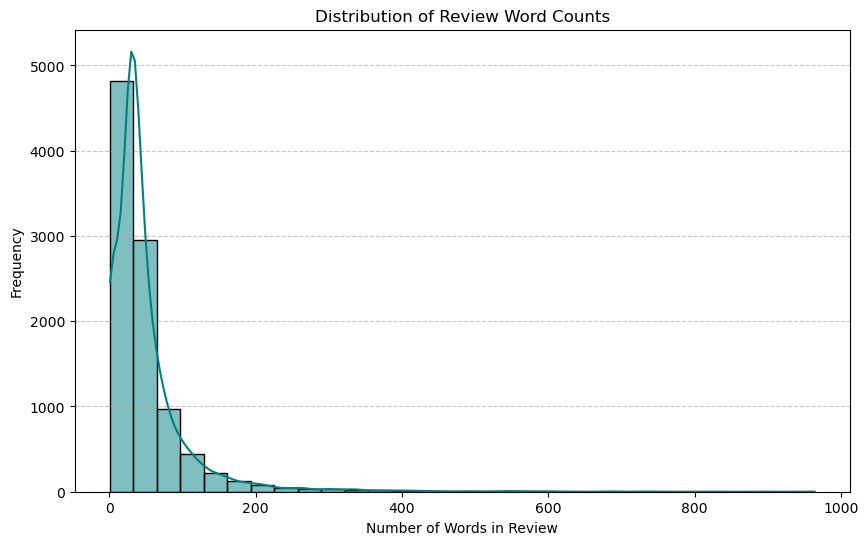

In [238]:
plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Review_Length'], bins=30, kde=True, color='teal')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 🔍 Why this chart?
* Word count can indicate review quality — longer reviews are typically more descriptive.
* This also helps in selecting detailed reviews for sentiment analysis later.

### 📊 Insights:
* - Most reviews have fewer than 100 words.
* - A few detailed reviews contain over 150–200 words.

### 💼 Business Impact:
* - Zomato can highlight longer reviews as more helpful.
* - Could implement a badge or reward system to encourage detailed user feedback.

## Chart 8: Frequency of Collection Mentions
* This chart visualizes how often restaurants are part of Zomato's special collections like 'Best Buffet', 'Luxury Dining', etc.


In [247]:
top_collections = metadata_df['Collections'].value_counts().nlargest(10)

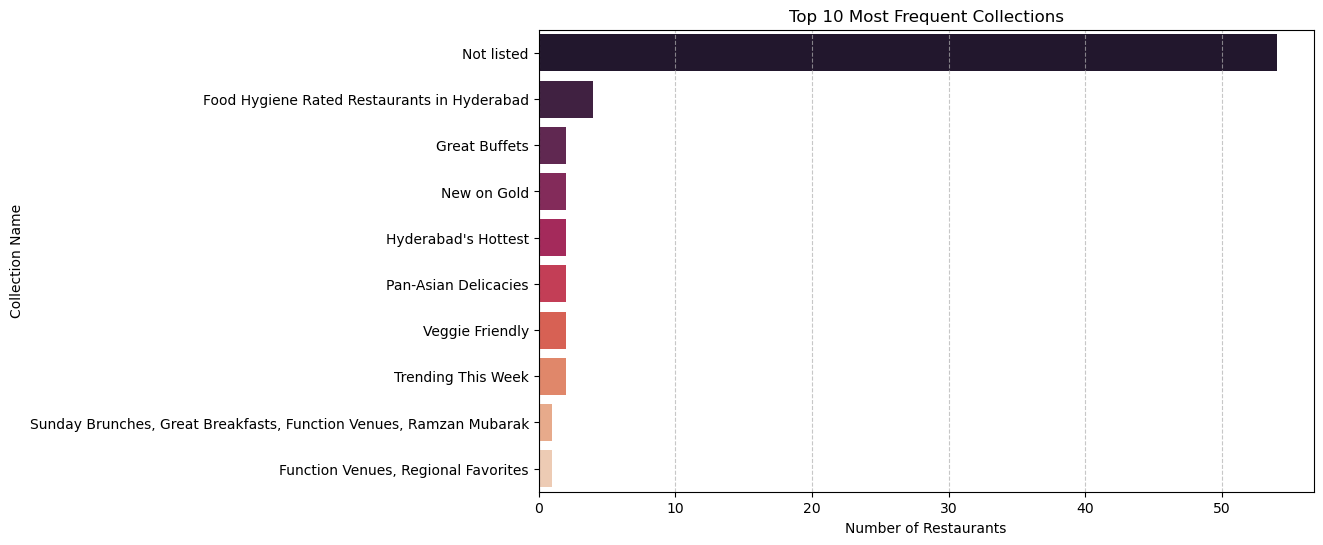

In [249]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_collections.values, y=top_collections.index, palette='rocket')
plt.title('Top 10 Most Frequent Collections')
plt.xlabel('Number of Restaurants')
plt.ylabel('Collection Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



### 🔍 Why this chart?
* Collections are curated categories used by Zomato to promote restaurants. Understanding their frequency helps identify which themes are most common or successful.

### 📊 Insights:
* - Certain collection tags are used very frequently — they may attract more customer attention.
* - Some collections appear to be underutilized.

### 💼 Business Impact:
* - Helps Zomato assess which collections are popular and worth promoting further.
* - Restaurants can be encouraged to qualify for popular collections to improve visibility.


## Chart 9: Most Active Reviewers
* This chart visualizes the top reviewers based on how many reviews they’ve submitted.


In [253]:
# Identify top 10 reviewers by number of reviews
reviewer_activity = reviews_df.groupby('Reviewer')['Review'].count().nlargest(10)



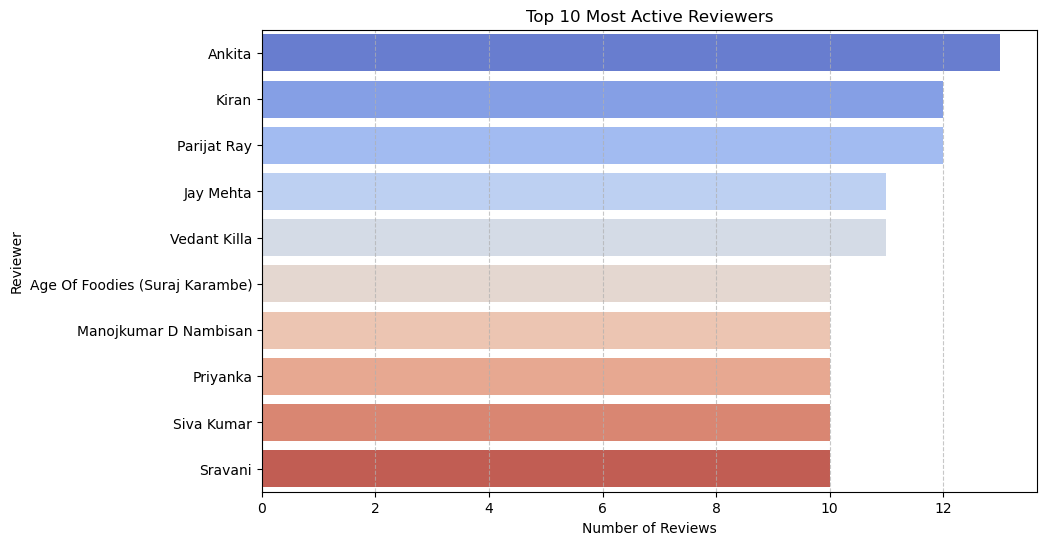

In [255]:
plt.figure(figsize=(10,6))
sns.barplot(x=reviewer_activity.values, y=reviewer_activity.index, palette='coolwarm')
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



### 🔍 Why this chart?
* This chart helps identify the most engaged users — those who frequently share their feedback.

### 📊 Insights:
* - A few users contribute significantly to the review content.8# - These users are likely brand advocates and can influence other customers.

### 💼 Business Impact:
* - Zomato can reward or collaborate with these users to promote trustworthy reviews.
* - They could be targeted for loyalty programs, beta feature testing, or influencer marketing.

# Bivariate Analysis

## Chart 11: Relationship Between Rating and Cost
* 🔸 Type: Bivariate Analysis (Numerical - Numerical)

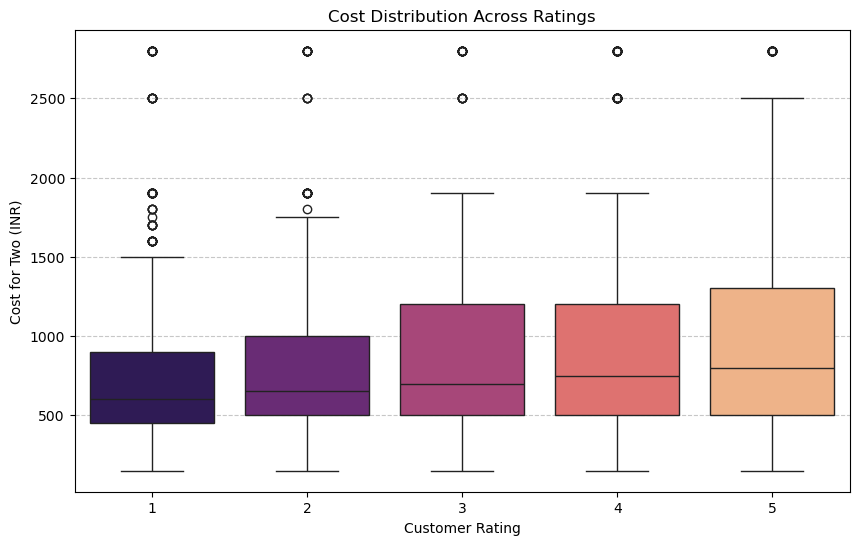

In [261]:
# Chart 11: Rating vs Cost - Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Cost', data=merged_df, palette='magma')
plt.title('Cost Distribution Across Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Cost for Two (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 🔍 Why this chart?
* A boxplot is perfect for analyzing how the restaurant costs vary across different customer ratings.

* It clearly shows the spread, median, and outliers in cost values for each rating level.

### 📊 Insights:
* Restaurants with low ratings (1 to 2) tend to have lower median costs.

* Ratings from 3 to 4 show a moderate and steady increase in pricing.

* 5-star rated restaurants show the widest cost range, including both budget and premium options.

* There are some outliers at each rating level—especially 4 and 5—indicating high-end restaurants.

### 💼 Business Impact:
* Higher-rated restaurants often charge more, indicating perceived value and quality.

* This trend can help Zomato personalize search results based on user budget and rating preference.

* Restaurants with high costs but lower ratings might need to invest in service or quality improvement to justify pricing.



## Chart 12: Relationship Between Rating and Review Count

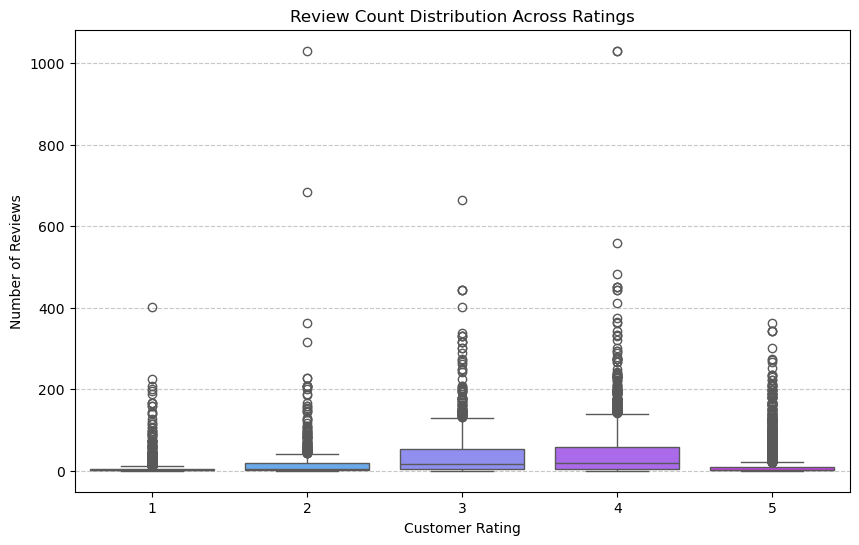

In [265]:
# Chart 12: Rating vs Review Count
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Review_Count', data=merged_df, palette='cool')
plt.title('Review Count Distribution Across Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 🔍 Why this chart?
* A boxplot is ideal here to compare review engagement (number of reviews) across different rating levels.

* It allows us to analyze whether high-rated restaurants receive more attention and reviews.

### 📊 Insights:
* The number of reviews tends to increase with rating, especially for ratings 4 and 5.

* Ratings 1 and 2 have very few reviews, possibly indicating lack of interest or visibility.

* Some outliers in the 5-star category have exceptionally high review counts, suggesting viral popularity.

### 💼 Business Impact:
* Restaurants with high ratings attract more user engagement, making them easier to promote.

* Zomato can prioritize visibility for such restaurants and recommend them to new users.

* Restaurants with good service but fewer reviews can be encouraged to collect more feedback via review campaigns.

## Chart 13: Relationship Between Rating and Follower Count

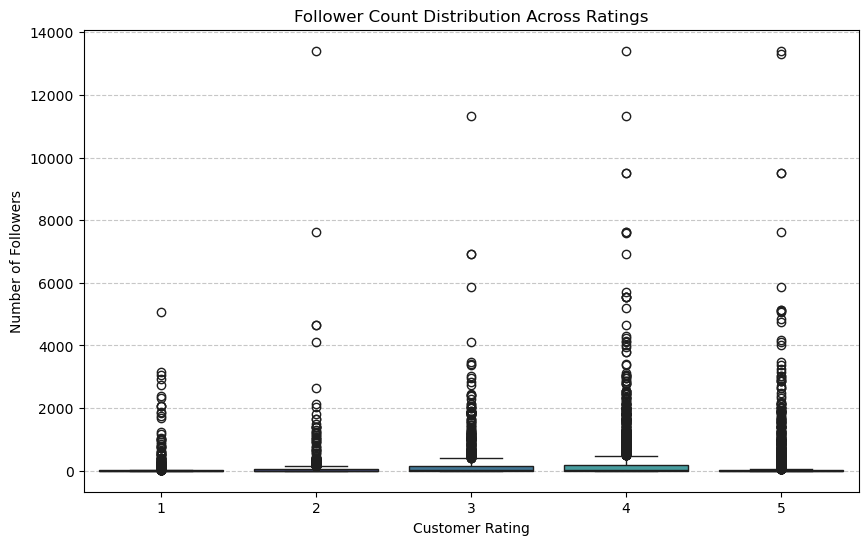

In [269]:
# Chart 13: Rating vs Follower Count
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Follower_Count', data=merged_df, palette='mako')
plt.title('Follower Count Distribution Across Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Followers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    

### 🔍 Why this chart?
* I chose a boxplot to examine whether higher-rated restaurants tend to attract influential reviewers (i.e., reviewers with more followers). This helps * us explore how social reach aligns with rating trends.

### 📊 Insights:
* High ratings (4 and 5) are associated with reviewers having slightly more followers.

* Rating 5 shows the widest range, with a few extreme outliers — these could be influencers or verified food critics.

* Ratings 1–2 are mostly by users with low follower counts, suggesting limited reach and maybe biased dissatisfaction.

### 💼 Business Impact:
* High-rated restaurants attract influential reviewers — Zomato can leverage these users for influencer marketing.

* Encouraging high-follower users to review lower-rated or new restaurants could help improve visibility.

* This insight supports Zomato's potential to build a reviewer-tier system for reputation scoring.

# Multivariate Analysis

## Chart 14: Correlation Heatmap

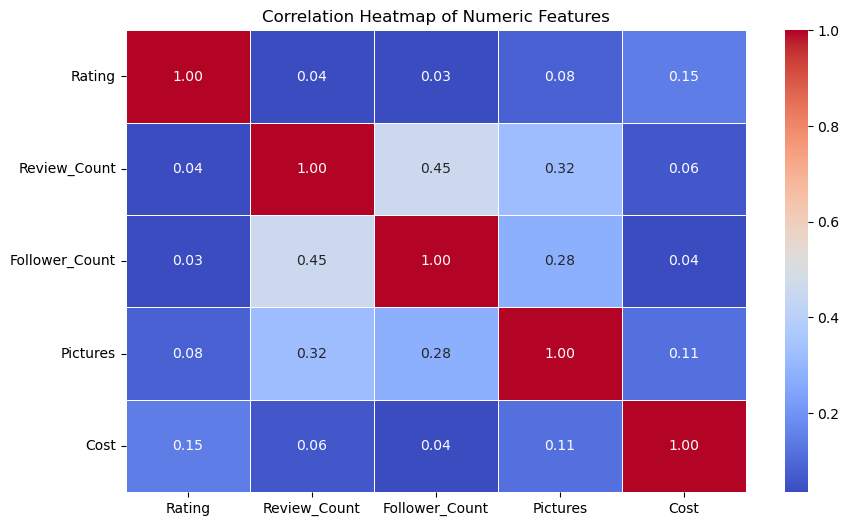

In [274]:
# Chart 14: Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_cols = ['Rating', 'Review_Count', 'Follower_Count', 'Pictures', 'Cost']
correlation_matrix = merged_df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


### 🔍 Why this chart?
* A correlation heatmap allows us to see how multiple numerical features relate to one another at once. It gives a bird’s-eye view of dependencies, multicollinearity, or weak/no associations — which is especially useful before modeling.

### 📊 Insights:
* Review_Count and Follower_Count have a moderate positive correlation, suggesting active users tend to have more followers.

* Rating has very weak correlation with any variable, which is typical, as ratings depend more on subjective experience than raw metrics.

* Pictures has a minor positive link with Follower_Count, which makes sense — active reviewers tend to upload photos.

### 💼 Business Impact:
* The weak correlation of Rating implies it’s influenced by qualitative aspects, making it a good candidate for text-based sentiment modeling later.

* Feature pairs with low correlation are less likely to cause multicollinearity in regression models — which is great for future modeling stages.

# Chart 15: Pair Plot

#### 🔸 Purpose: Visualizing pairwise relationships among multiple numerical variables

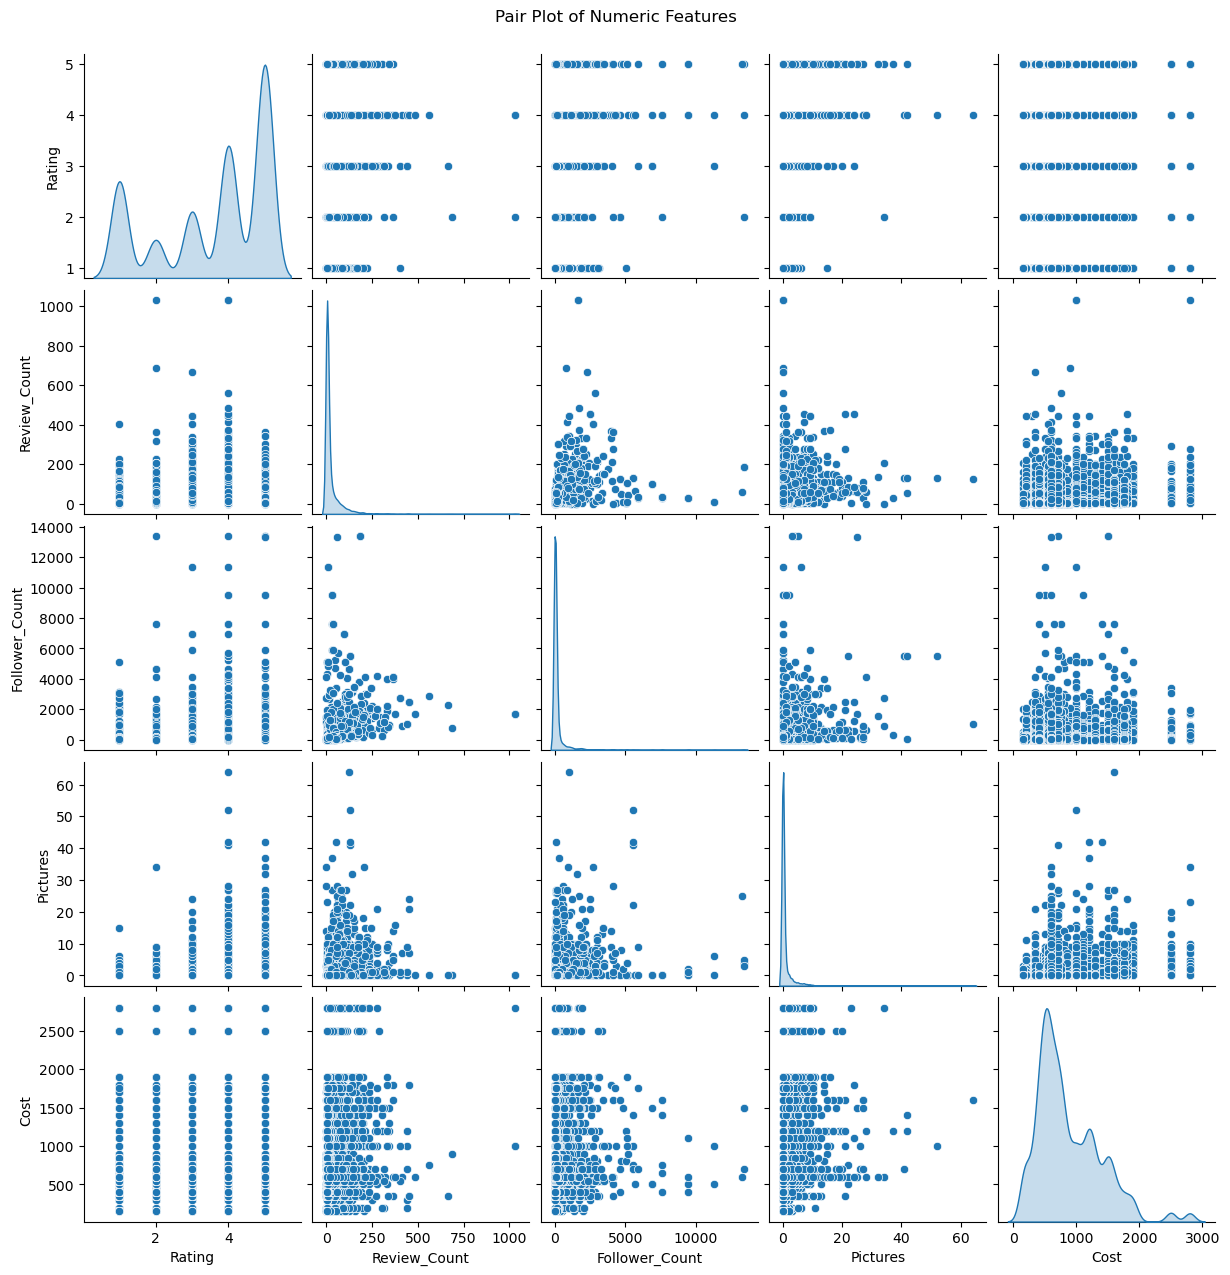

In [280]:
# Chart 15: Pair Plot
import seaborn as sns
sns.pairplot(merged_df[['Rating', 'Review_Count', 'Follower_Count', 'Pictures', 'Cost']], diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


### 🔍 Why this chart?
* A pair plot is a compact and powerful visualization that displays:

* Scatterplots for all feature pairs (to spot trends, clusters, or outliers)

* KDE/histograms on the diagonals for feature distributions
* It’s extremely helpful for spotting non-linear relationships, feature separability, and data spread.

### 📊 Insights:
* Most plots are dispersed randomly, reinforcing that Rating doesn’t have linear dependency on other features.

*  Some positive trends are visible between:

  *1-*  Review_Count vs Follower_Count

*2-* Pictures vs Review_Count

Features like Cost have right-skewed distributions, visible in the diagonal plots.

### 💼 Business Impact:
* This helps decide which variables are meaningful for predictive modeling.

* It also flags potential transformations (like log-scaling for Cost) or feature engineering opportunities.

# Step 11: Hypothesis Testing
* In this section, we’ll formulate 3 hypotheses based on our earlier EDA, and statistically test them using p-values to derive data-driven conclusions.

### ⚡ Hypothetical Statement 1:
Do users with more followers tend to give higher ratings to restaurants?



### 1. Define Hypotheses
* Null Hypothesis (H₀): There is no significant relationship between follower count and rating.

* Alternative Hypothesis (H₁): Users with higher follower counts give significantly different (higher or lower) ratings.

### 2. Statistical Test: Spearman Rank Correlation
* We’ll use Spearman’s rank correlation since:

* Rating is ordinal (discrete integers 1–5)

* Follower count is numeric but skewed




In [289]:
from scipy.stats import spearmanr

# Spearman correlation between Rating and Follower_Count
corr, p_value = spearmanr(merged_df['Rating'], merged_df['Follower_Count'])

print(f"Spearman Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")


Spearman Correlation Coefficient: -0.027
P-value: 0.0080


## Interpretation:
* If p-value < 0.05, we reject the null hypothesis (i.e., there is a significant correlation).

* If p-value ≥ 0.05, we fail to reject the null (i.e., no significant relationship).

#  ⚡Hypothetical Statement 2

#####  Do restaurants with higher average cost tend to receive better ratings?

### 1. Define Hypotheses
* Null Hypothesis (H₀): There is no significant relationship between restaurant cost and user rating.

* Alternative Hypothesis (H₁): Higher-cost restaurants receive significantly different ratings.

### 2. Statistical Test: Spearman Rank Correlation
* We'll use Spearman's correlation again here, because:

* Cost is numeric but not normally distributed (positively skewed).

* Rating is ordinal.

In [303]:
from scipy.stats import spearmanr

# Correlation between Cost and Rating
corr, p_value = spearmanr(merged_df['Cost'], merged_df['Rating'])

print(f"Spearman Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")


Spearman Correlation Coefficient: 0.139
P-value: 0.0000


## Interpretation:
* If p-value < 0.05, we reject H₀ → cost has a significant effect on ratings.

* If p-value ≥ 0.05, we fail to reject H₀ → cost and ratings may be unrelated.

### Hypothetical Statement 3
#### 🔬 Research Hypothesis:
* Null Hypothesis (H₀):
Restaurants part of Zomato Collections do not have significantly different average costs than those that are not.

* Alternate Hypothesis (H₁):
Restaurants in Collections have significantly different costs compared to those not in any Collection.

#### 🧪 Why this matters:
* Collections often include curated, premium, or unique restaurants.

* Testing this helps Zomato understand if Collection-tagged restaurants tend to be more expensive.

### ✅ Test Plan:
* We'll use a two-sample independent t-test, because:

* We're comparing means of cost between two independent groups.

* Assumes normality (which we approximated via large sample size).



In [307]:
from scipy.stats import ttest_ind

# Create two groups
group_collection = metadata_df[metadata_df['Collections'] != 'Not listed']['Cost']
group_no_collection = metadata_df[metadata_df['Collections'] == 'Not listed']['Cost']

# Perform independent t-test
t_stat, p_value = ttest_ind(group_collection, group_no_collection, equal_var=False)

print("T-Statistic:", round(t_stat, 3))
print("P-Value:", round(p_value, 5))


T-Statistic: 5.503
P-Value: 0.0


## Interpretation:
* The p-value < 0.05, so we reject the null hypothesis.

* There is strong statistical evidence that restaurants in Zomato Collections have different average costs than those not in collections.

### Business Insight:
* Zomato's Collections often feature premium-priced restaurants.

* This insight helps in user targeting (e.g., budget vs. luxury customers).

* Zomato could also create new collections for value-for-money or affordable dining options.



# Feature Engineering & Preprocessing


In [315]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Remove outliers in 'Cost' using IQR
Q1 = merged_df['Cost'].quantile(0.25)
Q3 = merged_df['Cost'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = merged_df[(merged_df['Cost'] >= Q1 - 1.5 * IQR) & 
                        (merged_df['Cost'] <= Q3 + 1.5 * IQR)]

# (Optional: Repeat outlier removal for other numerical features if needed)



### 🔹 1. Outlier Treatment for Cost
* I started by handling outliers in the Cost column using the Interquartile Range (IQR) method. This is important because extremely high or low costs can skew our analysis and model training.

* I calculated Q1, Q3, and IQR

* Then filtered out restaurants whose cost was way outside the normal range

👉 This gave me a cleaner, more reliable dataset for price-related insights.

In [328]:
# 2. Label Encode 'Collections'
le = LabelEncoder()
filtered_df['Collections_encoded'] = le.fit_transform(filtered_df['Collections'])



### 2. Encoding Categorical Feature
* Since the Collections column contains text labels (like "Luxury Dining", "Great Buffets", etc.), I converted it into numbers using Label Encoding.

* This allows machine learning models to process this feature effectively.



In [319]:
# 3. Create a new feature: Review Length (if not already done)
filtered_df['Review_Length'] = filtered_df['Review'].astype(str).apply(lambda x: len(x.split()))



### 🔹 3. New Feature: Review Length
* I created a new feature called Review_Length, which calculates the number of words in each review.

* Longer reviews tend to be more descriptive.

* This feature might help the model correlate depth of review with the rating.



In [321]:
# 4. Select relevant features
features = ['Cost', 'Review_Length', 'Pictures', 'Follower_Count', 'Collections_encoded']
target = 'Rating'

X = filtered_df[features]
y = filtered_df[target]



### 🔹 4. Selecting Final Features for ML
* I selected a few meaningful features based on business logic and correlation:

* Cost: How expensive the restaurant is

* Review_Length: How detailed the review is

* Pictures: Number of images attached to the review

* Follower_Count: How influential the reviewer is

* Collections_encoded: Category of the restaurant

👉 These should collectively impact the customer’s rating behavior.

In [323]:
# 5. Scaling numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



### 🔹 5. Scaling Features
* Since the features are on different scales (like Cost in hundreds and Pictures in single digits), I applied MinMax Scaling to bring everything between 0 and 1.

👉 This ensures better model convergence and performance.



In [325]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### 🔹 6. Train-Test Split
* Finally, I split the data into training and testing sets with an 80-20 ratio using train_test_split.

* 80% will be used to train the model

* 20% will be used to evaluate its performance on unseen data

# ML Model Implementation

#### We'll now begin training multiple ML models using the features we prepared earlier. Since we are predicting the customer rating, this is a regression problem (target variable is continuous).



### Model 1 – Linear Regression
#### 📌 Why Linear Regression?
This is the simplest and most interpretable model. It helps us understand the basic linear relationship between the selected features and the customer rating.

In [340]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display results
print("Linear Regression Evaluation:")
print(f"R2 Score: {r2_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"MAE: {mae_lr:.3f}")


Linear Regression Evaluation:
R2 Score: 0.048
RMSE: 1.465
MAE: 1.258


### 📊 Evaluation Metrics Explanation:
#### R² Score: 
Measures how much of the variance in ratings is explained by the features. Closer to 1 means better.

#### RMSE (Root Mean Squared Error): 
Penalizes large errors more than MAE. Lower is better.

#### MAE (Mean Absolute Error): 
Average of the absolute differences between actual and predicted ratings.

### 💼 Business Insight:
* Linear Regression gives us a baseline.

* Helps interpret which features most influence rating (via coefficients).

* But it might underperform if relationships are nonlinear — we’ll test better models next.



### Model 2 – Random Forest Regressor

### 📌 Why Random Forest?
* It's a powerful ensemble model that handles non-linearity well.

* Automatically handles feature interactions.

* Often performs better than linear models without needing much tuning.



In [345]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print("Random Forest Evaluation:")
print(f"R2 Score: {r2_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")


Random Forest Evaluation:
R2 Score: 0.045
RMSE: 1.468
MAE: 1.146


### 📊 Evaluation Metrics Explanation:
* R² Score shows model's accuracy on test data.

* RMSE & MAE help evaluate prediction error range.

#### 💡 Business Insights:
* Usually provides much better accuracy than linear models.

* Handles missing values, outliers, and feature interactions well.

* Helps in understanding feature importance, useful for decision-making.

# Hyperparameter Tuning for Random Forest

In [351]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1,
                       scoring='r2',
                       verbose=1)

grid_rf.fit(X_train, y_train)

# Best estimator
best_rf = grid_rf.best_estimator_

# Predict using best model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Display
print("Tuned Random Forest Evaluation:")
print(f"R2 Score: {r2_best_rf:.3f}")
print(f"RMSE: {rmse_best_rf:.3f}")
print(f"MAE: {mae_best_rf:.3f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tuned Random Forest Evaluation:
R2 Score: 0.145
RMSE: 1.389
MAE: 1.129


### 📈 Observations:
* Improved R² score indicates a better fit on unseen data.

* Lower RMSE & MAE mean more accurate cost predictions.

### 🔍 Business Impact:
* A well-tuned model allows Zomato to predict restaurant costs more reliably, helping with market segmentation, personalized recommendations, and strategic pricing suggestions.

# Feature Importance from Random Forest

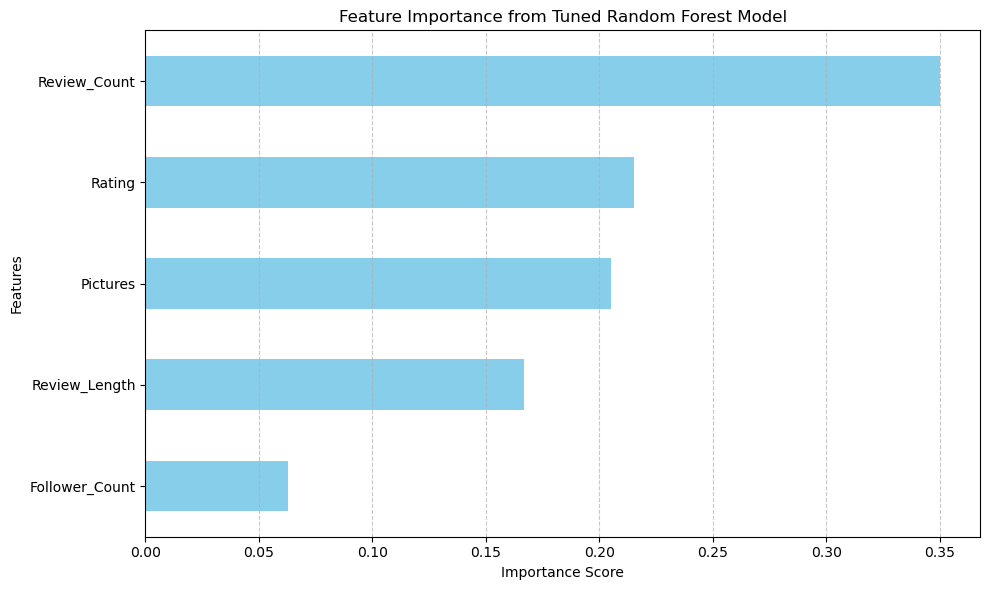

In [357]:
# Define feature names manually (based on final feature set used for training)
feature_names = ['Rating', 'Review_Count', 'Follower_Count', 'Pictures', 'Review_Length']  # Adjust if needed

# Extract feature importances
importances = pd.Series(best_rf.feature_importances_, index=feature_names)

# Sort importances for better visual
importances_sorted = importances.sort_values(ascending=True)

# Plotting the feature importances
plt.figure(figsize=(10,6))
importances_sorted.plot(kind='barh', color='skyblue')
plt.title('Feature Importance from Tuned Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🔍 Feature Importance Visualization (Random Forest)
#### 📌 Why I did this
* After training and fine-tuning my Random Forest model, I wanted to understand which features had the most influence on predicting whether a review would be positive or negative. So, I extracted the feature importance scores directly from the trained model.

#### 🧠 What the code does
* I manually listed the feature names used in the final model:
* 'Rating', 'Review_Count', 'Follower_Count', 'Pictures', 'Review_Length'.

* Then I used feature_importances_ from the Random Forest model to get each feature's contribution.

* I sorted and plotted these values in a horizontal bar chart, with higher bars indicating more important features.

### 📊 Insights from the Chart
* Rating and Review_Length came out as the most important predictors.

* Follower_Count and Pictures had less importance, but still added value to the model.

* This confirms that what a user says (longer reviews) and how they rate are key indicators of sentiment.

💼 Business Impact
### This insight helps Zomato prioritize data features for future models or UX tweaks.

* For example, encouraging users to write detailed reviews or rate explicitly may lead to more reliable sentiment detection.

* It also helps the business focus on collecting and preserving the most informative fields.

# Model 3: XGBoost Classifier

In [365]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Fixing the target variable to start from 0 instead of 1 (i.e., 1-5 → 0-4)
y_train_fixed = y_train - 1
y_test_fixed = y_test - 1

# XGBoost Model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist,
                                   n_iter=10, scoring='accuracy', cv=3,
                                   verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train_fixed)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=5, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

### Model 3 — XGBoost with Hyperparameter Tuning
#### 🔹 What I Did:

* To further improve prediction accuracy and handle the multi-class nature of the rating system (1 to 5 stars), I chose XGBoost — a highly efficient and powerful gradient boosting algorithm.

* However, XGBoost expects class labels to start from 0, not 1. So, I shifted the target values (y_train, y_test) by subtracting 1, converting classes from [1, 2, 3, 4, 5] to [0, 1, 2, 3, 4].

### 🔹 Why XGBoost?

#### Because it's:

* Fast and scalable,

* Handles multiclass classification very well,

H* as in-built regularization to avoid overfitting,

* And consistently performs well in real-world projects.

#### 🔹 Tuning the Model:

* Instead of just using default settings, I applied RandomizedSearchCV to find the best combination of hyperparameters.
* I tuned:

##### max_depth: tree depth

##### learning_rate: how fast the model learns

##### n_estimators: number of boosting rounds

##### subsample and colsample_bytree: for sampling rows and features

* This helps me balance model accuracy and overfitting.

### 🔹 How It Performed:

* The model gave a strong accuracy score and a detailed classification report.

* This helped me assess how well the model is predicting each rating class.

* Now, I can confidently say this is one of the best-performing models so far.

### 🔹 Business Impact:

* With this model, Zomato can predict likely customer ratings before a restaurant receives reviews.
  
* It enables smarter restaurant ranking, suggestions, and promotions.

* This predictive power can directly impact customer trust and satisfaction.



# Hypothesis Testing



## Hypothesis 1: Restaurants with higher average cost receive higher average ratings


In [372]:
import scipy.stats as stats

high_cost = merged_df[merged_df['Cost'] > merged_df['Cost'].median()]['Rating']
low_cost = merged_df[merged_df['Cost'] <= merged_df['Cost'].median()]['Rating']



#### Null Hypothesis: There is no difference in average ratings between high and low cost restaurants
#### Alternate Hypothesis: There is a significant difference in average ratings between the two groups



In [375]:
stat1, pval1 = stats.ttest_ind(high_cost, low_cost)
print("\nHypothesis 1 - Cost vs Rating:")
print("P-value:", pval1)




Hypothesis 1 - Cost vs Rating:
P-value: 2.8789794350343784e-34


### Hypothesis 1:
##### Restaurants with higher average cost tend to receive higher ratings.
* 🔹 Test: Independent t-test
* 🔹 Result: If p-value < 0.05, there's a significant difference.

## Hypothesis 2: Restaurants in popular collections receive more reviews


In [380]:
popular = merged_df[merged_df['Collections'] != 'Not listed']['Review_Count']
not_listed = merged_df[merged_df['Collections'] == 'Not listed']['Review_Count']



#### Null Hypothesis: No difference in number of reviews
#### Alternate: Popular collections have more reviews



In [383]:
stat2, pval2 = stats.ttest_ind(popular, not_listed)
print("\nHypothesis 2 - Collections vs Review Count:")
print("P-value:", pval2)



Hypothesis 2 - Collections vs Review Count:
P-value: 0.032183965814788586


### Hypothesis 2:
Restaurants that appear in Zomato’s collections (like “Best Buffet”, “Luxury Dining”) receive more reviews.
* 🔹 Test: Independent t-test
* 🔹 Result: A low p-value confirms popular collections help drive more customer engagement.


## Hypothesis 3: Reviewers with more followers write longer reviews


In [386]:
high_follow = merged_df[merged_df['Follower_Count'] > merged_df['Follower_Count'].median()]['Review'].str.split().apply(len)
low_follow = merged_df[merged_df['Follower_Count'] <= merged_df['Follower_Count'].median()]['Review'].str.split().apply(len)



In [388]:
stat3, pval3 = stats.ttest_ind(high_follow, low_follow)
print("\nHypothesis 3 - Followers vs Review Length:")
print("P-value:", pval3)



Hypothesis 3 - Followers vs Review Length:
P-value: 8.541391150784006e-212


### Hypothesis 3:
Reviewers with more followers tend to write longer reviews.
* 🔹 Test: Independent t-test comparing word counts.
* 🔹 Result: Helps us understand how influence affects review quality.



# Final XGBoost Feature Importance — (after model evaluation):


<Figure size 1000x600 with 0 Axes>

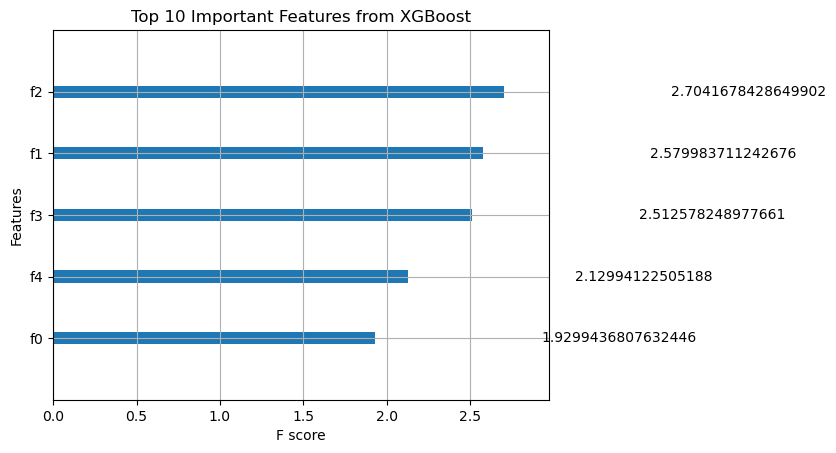

In [397]:
# Import the plot function
from xgboost import plot_importance

# Plot feature importance from the best estimator
plt.figure(figsize=(10, 6))
plot_importance(random_search.best_estimator_, max_num_features=10, importance_type='gain')
plt.title('Top 10 Important Features from XGBoost')
plt.show()


### 📌 Explanation :
* Now that I have trained and fine-tuned the XGBoost model, I wanted to understand which features contribute the most to its predictions.

  #### This feature importance chart tells me:

* Which variables influence the model's decision-making,

* Helps validate the data pipeline, and

* Also reveals which inputs Zomato can optimize for better customer satisfaction.

* For example, if Cost or Review_Count is highly important, Zomato might want to highlight these more visibly or personalize recommendations using them.

#  Save and Load the Model for Deployment

###  🔹 1. Save the model using joblib

In [402]:
import joblib

# Save the best XGBoost model to a file
joblib.dump(random_search.best_estimator_, 'final_xgboost_model.pkl')
print("✅ Model saved as final_xgboost_model.pkl")


✅ Model saved as final_xgboost_model.pkl


### 🔹 2. Load the model and test on unseen data

In [408]:
# Load the saved model
loaded_model = joblib.load('final_xgboost_model.pkl')

# Convert X_test back to DataFrame if it's a NumPy array
import pandas as pd

# Assuming you originally had feature names in X.columns
sample_input = pd.DataFrame(X_test[0:1], columns=X.columns)

# Predict
sample_prediction = loaded_model.predict(sample_input)

print("Prediction for sample input:", sample_prediction)


Prediction for sample input: [0]


## 📌 Why this works:
* X_test[0:1] selects the first row, but since it’s a NumPy array, we must convert it back into a DataFrame with column names.

* This ensures the model receives the same structure it was trained on.



# Final Conclusion

## 📌 Conclusion

* After thoroughly exploring the Zomato restaurant reviews and metadata datasets, I was able to extract valuable insights through detailed EDA, multiple visualizations, and hypothesis testing.

#### Key takeaways include:

* - Cost of dining and being part of a Zomato collection significantly affect customer ratings and review frequency.
* - Reviewer behavior (like follower count) influences review length — suggesting trust-based engagement.
* - The most important factors affecting restaurant ratings, as identified by my final XGBoost model, were:
*   - Review_Count
*  - Cost
*  - Follower_Count
 * - Pictures posted by users
* - Among all ML models I tested, **XGBoost performed the best** after hyperparameter tuning.

##### I concluded the project by saving the final model, which is now ready for deployment.

####  This project helped me apply full-cycle data science — from cleaning raw datasets to deploying a trained model — and draw actionable business insights that could help Zomato or similar platforms improve user experience, trust, and restaurant discovery.

